<a href="https://colab.research.google.com/github/MohonaMohsin/ImageClassification_ShellVsPebble_CNN/blob/main/ImageClassification_ShellVsPebble_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
# Create folder structure
!mkdir -p /content/data/shell /content/data/pebble /content/data/logs /content/models

In [115]:
#  Upload SHELL images directly to shell folder
from google.colab import files
import shutil
import os

print(" Upload SHELL images (select all images from your shell folder)...")
shell_uploaded = files.upload()

# Move all uploaded shell images to shell folder
for filename in shell_uploaded.keys():
    shutil.move(filename, f'/content/data/shell/{filename}')

print(f" Uploaded {len(shell_uploaded)} shell images")

#  Upload PEBBLE images directly to pebble folder
print(" Upload PEBBLE images (select all images from your pebble folder)...")
pebble_uploaded = files.upload()

# Move all uploaded PEBBLE images to pebble folder
for filename in pebble_uploaded.keys():
    shutil.move(filename, f'/content/data/pebble/{filename}')

print(f" Uploaded {len(pebble_uploaded)} pebble images")

#  Verify the upload
print("\n Final Folder Structure:")
!find /content/data -type d

print(f"\n📊 Upload Summary:")
print(f" Shell images: {len(os.listdir('/content/data/shell'))}")
print(f" Pebble images: {len(os.listdir('/content/data/pebble'))}")
print(f" Logs folder: {len(os.listdir('/content/data/logs'))} files")

print("\n Ready for training! Your images are in:")
print("   /content/data/shell/")
print("   /content/data/pebble/")

 Upload SHELL images (select all images from your shell folder)...


 Uploaded 0 shell images
 Upload PEBBLE images (select all images from your pebble folder)...


 Uploaded 0 pebble images

 Final Folder Structure:
/content/data
/content/data/logs
/content/data/shell
/content/data/pebble

📊 Upload Summary:
 Shell images: 66
 Pebble images: 56
 Logs folder: 0 files

 Ready for training! Your images are in:
   /content/data/shell/
   /content/data/pebble/


In [116]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [117]:
import os

In [118]:
os.path.join('data', 'shell')

'data/shell'

In [119]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [120]:
tf.config.list_physical_devices('GPU')

[]

In [121]:
len(gpus)

0

# Remove incompatible images

In [122]:
import cv2
import imghdr

In [123]:
# setting up path variable
data_dir = '/content/data'

In [124]:
# showing all images on the folder
os.listdir(os.path.join(data_dir, 'shell'))

['Shells (594).jpg',
 'Shells (590).jpg',
 'Shells (807).jpg',
 'Shells (1099).jpg',
 'Shells (4).png',
 'Shells (931).jpg',
 'Shells (586).jpg',
 'Shells (1499).jpg',
 'Shells (1490).jpg',
 'Shells (929).jpg',
 'Shells (943).jpg',
 'Shells (1487).jpg',
 'Shells (591).jpg',
 'Shells (866).jpg',
 'Shells (944).jpg',
 'Shells (940).jpg',
 'Shells (1087).jpg',
 'Shells (1500).jpg',
 'Shells (1059).jpg',
 'Shells (1096).jpg',
 'Shells (1492).jpg',
 'Shells (927).jpg',
 'Shells (936).jpg',
 'Shells (589).jpg',
 'Shells (1088).jpg',
 'Shells (928).jpg',
 'Shells (1058).jpg',
 'Shells (1).png',
 'Shells (937).jpg',
 'Shells (868).jpg',
 'Shells (808).jpg',
 'Shells (938).jpg',
 'Shells (934).jpg',
 'Shells (930).jpg',
 'Shells (1501).jpg',
 'Shells (1498).jpg',
 'Shells (1488).jpg',
 'Shells (1089).jpg',
 'Shells (1057).jpg',
 'Shells (792).jpg',
 'Shells (1097).jpg',
 'Shells (587).jpg',
 'Shells (1489).jpg',
 'Shells (942).jpg',
 'Shells (588).jpg',
 'Shells (3).png',
 'Shells (926).jpg',
 

In [125]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [126]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(' Removing incompatible image: {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print(' Issue with image {}, removing: {}'.format(image_path, e))
            os.remove(image_path)

# Load Data

In [127]:
#  Check current structure
print(" Current folder structure:")
!find /content/data -type d

#  Remove extra folders (keep only shell and pebble)
import shutil
folders_to_keep = ['shell', 'pebble']

for folder in os.listdir('/content/data'):
    folder_path = os.path.join('/content/data', folder)
    if os.path.isdir(folder_path) and folder not in folders_to_keep:
        shutil.rmtree(folder_path)
        print(f" Removed: {folder}")

#  Reload dataset
data = tf.keras.utils.image_dataset_from_directory(
    '/content/data',
    class_names=['shell', 'pebble'],  # Force 2 classes
    image_size=(256, 256),
    batch_size=32
)

print(f" Classes: {data.class_names}")

#  Verify labels
batch = data.as_numpy_iterator().next()
images, labels = batch
print(f" Label distribution in batch: {np.unique(labels, return_counts=True)}")

 Current folder structure:
/content/data
/content/data/logs
/content/data/shell
/content/data/pebble
 Removed: logs
Found 122 files belonging to 2 classes.
 Classes: ['shell', 'pebble']
 Label distribution in batch: (array([0, 1], dtype=int32), array([15, 17]))


In [128]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [129]:
import numpy as np
from matplotlib import pyplot as plt

In [130]:
# to check 'kera' 's functionality
tf.keras.utils.image_dataset_from_directory??

In [131]:
# accessig 'kera' 's predefined data pipeline function
# building our data pipeline
# Recreating the dataset after image cleaning to ensure only valid images are loaded
data = tf.keras.utils.image_dataset_from_directory('/content/data')

Found 122 files belonging to 2 classes.


In [132]:
# allowing to access our data pipeline
data_iterator = data.as_numpy_iterator()

In [133]:
# accessing the dta pipeline itself
batch = data_iterator.next()

In [134]:
# output : 2 (images, labels)
len(batch)

2

In [135]:
# images represented by numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [136]:
# class 1 - shell
# class 2 - pebble
batch[1]

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1], dtype=int32)

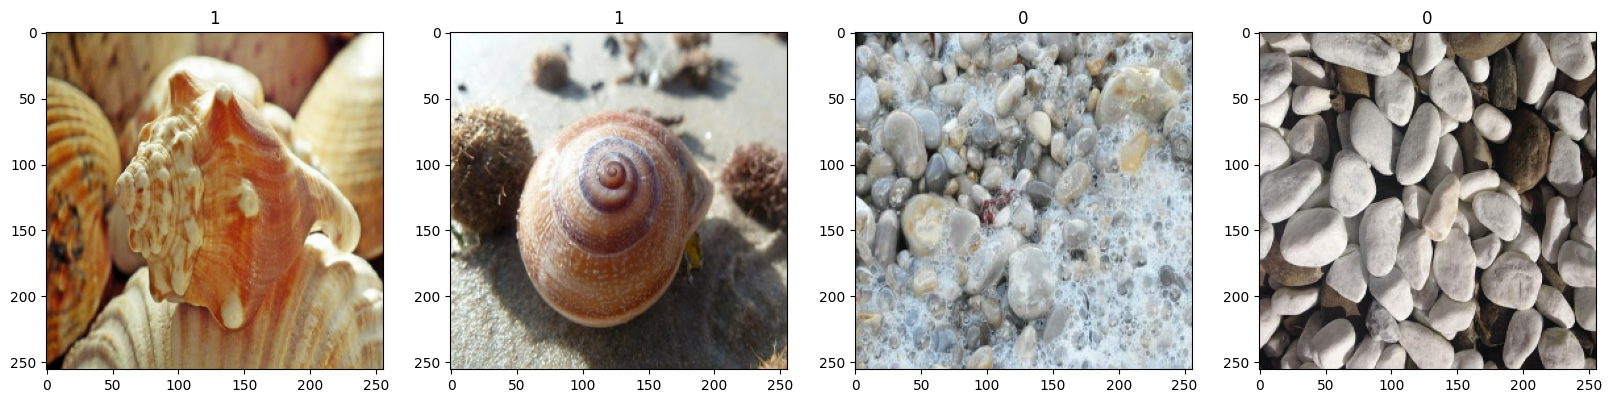

In [137]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale the images between 0 and 1

In [138]:
# dividing by 255 to keep data between 0 & 1
scaled = batch[0] / 255

In [139]:
# check purpose
scaled.max()

np.float32(1.0)

In [140]:
# data.map -> allows transformation in pipeline
# x -> images (independent features, as in INPUT)
# y -> target variable
# no transformation on y
# go tf.data.dataset to explore more functions
data = data.map(lambda x,y: (x/255, y))

In [141]:
# Get the iterator from the scaled dataset
scaled_iterator = data.as_numpy_iterator()

In [142]:
# Get the next batch from the iterator
batch = scaled_iterator.next()

In [143]:
batch[0].min()

np.float32(0.0)

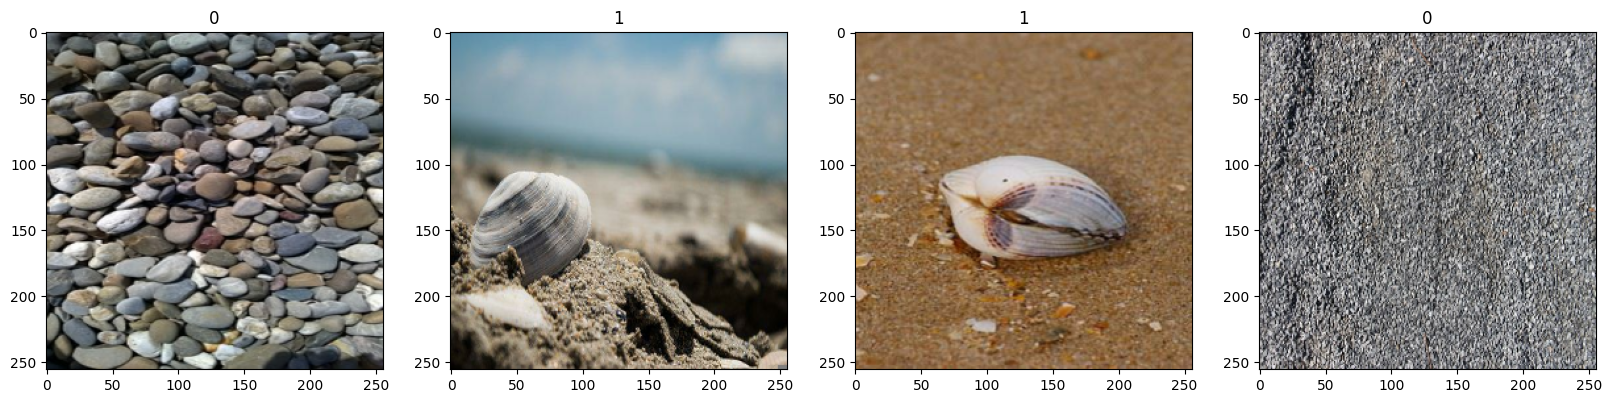

In [144]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# Split the Data

In [145]:
# output : 4 -> That means we have 4 batches
len (data)

4

In [146]:
# 1. train -> input values/entities to train the model 70%
# 2. val -> to evaluate our model with this 10%
# 3. test -> unseen untill evaluation 10%
# 1 & 2 for trainnig, 3 for post training

train_size = int(len(data)* 0.7) # 2
val_size = int(len(data)*0.2)+1 # 1
test_size = int(len(data)*0.1)+1 # 1

In [147]:
train_size+val_size+test_size

4

In [148]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Build Deep Learning Model

In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [150]:
model = Sequential()

In [151]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

# 256 = neurons
model.add(Dense(256, activation='relu'))
# 1 = final Output
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [152]:
# addam = optimizer (also haver other optimizer)
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [153]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# Train

In [154]:
logdir='logs'

In [155]:
# callback = to save the model at some perticular checkpoint
# This is for logout of the training model
# also to see back how well the model performed at some specific point
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [156]:
# hist = history
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5000 - loss: 1.6311 - val_accuracy: 0.8125 - val_loss: 0.6474
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.7708 - loss: 0.7573 - val_accuracy: 0.6250 - val_loss: 1.0011
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5521 - loss: 1.1456 - val_accuracy: 0.4062 - val_loss: 0.9470
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5833 - loss: 0.6997 - val_accuracy: 0.6562 - val_loss: 0.6766
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.6146 - loss: 0.6819 - val_accuracy: 0.4375 - val_loss: 0.6915
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3854 - loss: 0.7193 - val_accuracy: 0.6562 - val_loss: 0.6683
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6250 - loss: 0.6623 - val_accuracy: 0.5938 - val_loss: 0.6601
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5312 - loss: 0.6637 - val_accuracy: 0.7812 - val_loss: 0.6497
Epoch 9/20
2/2 ━

# Plot Performance

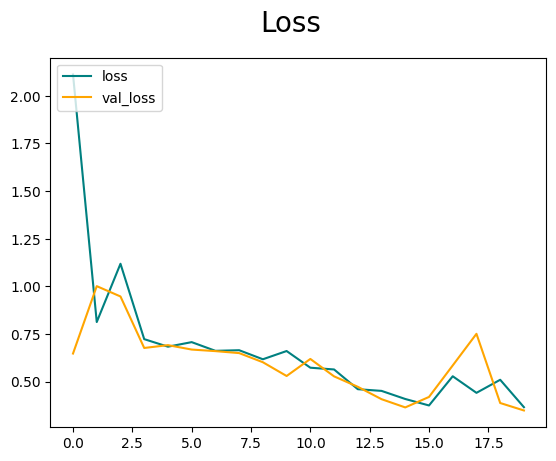

In [157]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

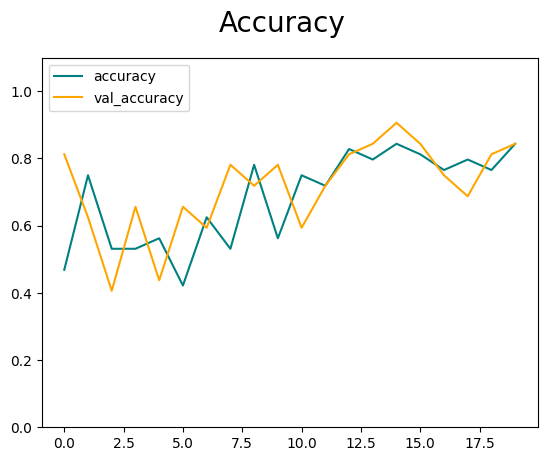

In [158]:
fig = plt.figure()

# Try different possible key names
if 'accuracy' in hist.history:
    plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
    plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
elif 'acc' in hist.history:
    plt.plot(hist.history['acc'], color='teal', label='accuracy')
    plt.plot(hist.history['val_acc'], color='orange', label='val_accuracy')

fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.ylim(0, 1.1)
plt.show()

# Evaluate Performance

#  Evaluate

In [159]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [160]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [161]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


In [162]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.75, shape=(), dtype=float32) tf.Tensor(0.6666667, shape=(), dtype=float32) tf.Tensor(0.8076923, shape=(), dtype=float32)


#Test

In [163]:
import cv2

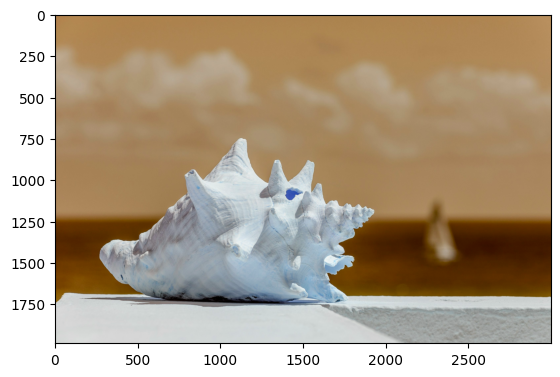

In [165]:
img = cv2.imread('/content/shellimage5.jpg')
plt.imshow(img)
plt.show()

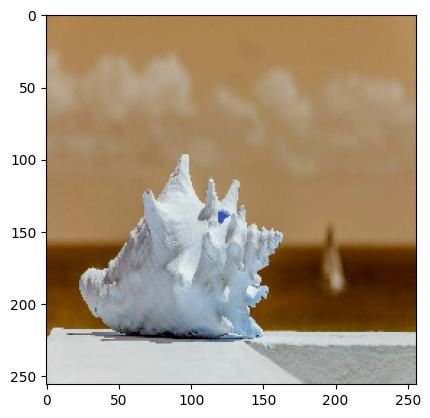

In [166]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [167]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


In [168]:
yhat

array([[0.8722961]], dtype=float32)

In [169]:
if yhat > 0.5:
    print(f'Predicted class is Shell')
else:
    print(f'Predicted class is Pebble')

Predicted class is Shell


# Save the Model

In [170]:
from tensorflow.keras.models import load_model

In [171]:
# h5 = serialization model format
model.save(os.path.join('models','ShellOrPebbleDetector.h5'))

In [172]:
new_model = load_model(os.path.join('models', 'ShellOrPebbleDetector.h5'))

In [173]:
new_model

<Sequential name=sequential_1, built=True>

In [174]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


array([[0.8722961]], dtype=float32)